## Try Tensorflow/Keras continuous methods

## This runs in about 15 minutes on my laptop 

In [1]:
# Import required libraries 
# for loading CSV to pandas and numpy data types

import pandas as pd 
import numpy as np 
import pandas

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Load the predictor and target data to a pandas dataframe


In [2]:
# read target df from local 
# target_df = pd.read_csv("dataframes/target_df.csv.gz", compression="infer", parse_dates = ["opday"])

# read target_df directly from github
target_df = pd.read_csv("https://github.com/k5dru/CPSC_5383/blob/main/dataframes/target_df.csv.gz?raw=true", compression="gzip", parse_dates = ["opday"])

### View the source data

Always view the source data.  Pandas makes this trivial.

In [3]:
target_df.head()

,opday,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
0,2015-10-03,566229.834662,0,0,1,0,0,0,0,0,...,0.0,0.0,1.05,5.28,0.00,0.0,0.0,3.30,18.24,16.98
1,2015-10-04,552166.723416,0,0,0,1,0,0,0,0,...,0.0,0.0,0.00,8.34,0.00,0.0,0.0,1.14,18.96,15.00
2,2015-10-05,596751.461994,0,1,0,0,0,0,0,0,...,0.0,0.0,0.00,7.44,1.14,0.0,0.0,1.14,12.30,7.08
3,2015-10-06,622735.355003,0,0,0,0,0,1,0,0,...,0.0,0.0,0.00,3.48,0.00,0.0,0.0,0.60,12.12,8.97
4,2015-10-07,645464.796588,0,0,0,0,0,0,1,0,...,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.00,7.44,0.51


In [4]:
target_df.describe()

,sum_spp_load,is_Friday,is_Monday,is_Saturday,is_Sunday,is_Thursday,is_Tuesday,is_Wednesday,holiday_Christmas Day,holiday_Christmas Eve,...,HDD_TX_DALLAS_FT_WORTH_AP,HDD_TX_DALLAS_LOVE_FLD,HDD_TX_FT_WORTH_ALLIANCE_AP,HDD_TX_LUBBOCK,HDD_TX_MIDLAND_ODESSA,HDD_TX_SAN_ANGELO,HDD_TX_WACO_RGNL_AP,HDD_TX_WICHITA_FALLS_MUNI_AP,HDD_WY_CHEYENNE,HDD_WY_TORRINGTON_MUNI_AP
count,1.535000e+03,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,...,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000,1535.000000
mean,7.178639e+05,0.142671,0.143974,0.142671,0.143322,0.141368,0.142671,0.143322,0.003909,0.003257,...,5.443349,5.159023,6.173375,8.910704,6.428717,5.824339,5.486463,7.879974,19.121863,18.240430
std,1.007130e+05,0.349851,0.351178,0.349851,0.350516,0.348514,0.349851,0.350516,0.062418,0.056999,...,8.633520,8.407970,9.136330,11.073380,9.305757,8.850519,8.568441,10.596462,15.683710,16.434591
min,5.400074e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.367939e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.480000,0.000000
50%,6.941424e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,2.760000,0.000000,0.000000,0.000000,0.960000,18.600000,16.890000
75%,7.862803e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.060000,8.340000,10.995000,16.620000,11.760000,10.500000,9.420000,14.190000,30.660000,29.850000
max,1.016596e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,42.000000,41.820000,44.970000,52.980000,46.860000,45.420000,44.520000,48.660000,69.540000,76.380000


In [5]:
target_df.columns


Index(['opday', 'sum_spp_load', 'is_Friday', 'is_Monday', 'is_Saturday',
       'is_Sunday', 'is_Thursday', 'is_Tuesday', 'is_Wednesday',
       'holiday_Christmas Day',
       ...
       'HDD_TX_DALLAS_FT_WORTH_AP', 'HDD_TX_DALLAS_LOVE_FLD',
       'HDD_TX_FT_WORTH_ALLIANCE_AP', 'HDD_TX_LUBBOCK',
       'HDD_TX_MIDLAND_ODESSA', 'HDD_TX_SAN_ANGELO', 'HDD_TX_WACO_RGNL_AP',
       'HDD_TX_WICHITA_FALLS_MUNI_AP', 'HDD_WY_CHEYENNE',
       'HDD_WY_TORRINGTON_MUNI_AP'],
      dtype='object', length=483)

## Selection of the predictor measures

and convert the predictors and target to a numpy matrix and vector respectively



In [6]:
predictors_df = target_df[[
# best parameters from genetic search:

 # weekdays
    'is_Saturday', 'is_Sunday',
   # 'is_Thursday',
   # 'is_Friday', 'is_Monday', 'is_Tuesday', 'is_Wednesday',
  # various holidays
   # 'holiday_Christmas Day', 'holiday_Christmas Eve',
   # 'holiday_Day After Thanksgiving', 'holiday_Independence Day',
   # 'holiday_Labor Day', 'holiday_Memorial Day',
    'holiday_New Year\'s Day',
   # 'holiday_Thanksgiving', 
  # any holiday:
    'is_holiday',   
    
# best weather stations from genetic search:    
    'TAVG_KS_DODGE_CITY',
    'TAVG_LA_SHREVEPORT', 
    'TAVG_MO_SPRINGFIELD',
    'TAVG_NE_LINCOLN_MUNI_AP', 
    'TAVG_OK_LAWTON_MUNI_AP',
    'TAVG_WY_TORRINGTON_MUNI_AP',
    'TAVG_AR_FT_SMITH_RGNL_AP', 
    'TAVG_IA_SIOUX_CITY_GATEWAY_AP',  
    
    'TMIN_KS_DODGE_CITY',
    'TMIN_LA_SHREVEPORT', 
    'TMIN_MO_SPRINGFIELD',
    'TMIN_NE_LINCOLN_MUNI_AP', 
    'TMIN_OK_LAWTON_MUNI_AP',
    'TMIN_WY_TORRINGTON_MUNI_AP',
    'TMIN_AR_FT_SMITH_RGNL_AP', 
    'TMIN_IA_SIOUX_CITY_GATEWAY_AP',
    
    'TMAX_KS_DODGE_CITY',
    'TMAX_LA_SHREVEPORT', 
    'TMAX_MO_SPRINGFIELD',
    'TMAX_NE_LINCOLN_MUNI_AP', 
    'TMAX_OK_LAWTON_MUNI_AP',
    'TMAX_WY_TORRINGTON_MUNI_AP',
    'TMAX_AR_FT_SMITH_RGNL_AP', 
    'TMAX_IA_SIOUX_CITY_GATEWAY_AP',
# HDD and CDD on those stations also for linear models
    'HDD_KS_DODGE_CITY',
    'HDD_LA_SHREVEPORT', 
    'HDD_MO_SPRINGFIELD',
    'HDD_NE_LINCOLN_MUNI_AP', 
    'HDD_OK_LAWTON_MUNI_AP',
    'HDD_WY_TORRINGTON_MUNI_AP',
    'HDD_AR_FT_SMITH_RGNL_AP', 
    'HDD_IA_SIOUX_CITY_GATEWAY_AP',
    
    'CDD_KS_DODGE_CITY',
    'CDD_LA_SHREVEPORT', 
    'CDD_MO_SPRINGFIELD',
    'CDD_NE_LINCOLN_MUNI_AP', 
    'CDD_OK_LAWTON_MUNI_AP',
    'CDD_WY_TORRINGTON_MUNI_AP',
    'CDD_AR_FT_SMITH_RGNL_AP', 
    'CDD_IA_SIOUX_CITY_GATEWAY_AP',  
   
]].copy()

In [7]:
# Or if you want to try everything:
# predictors_df = target_df.drop(['opday', 'sum_spp_load'], axis=1).copy()

## See the note in the Algorithms workbook about "opmonth"

I believe it models electric demand growth over time.  I'm open to suggestions. 
Since I used it there, I need to be consistent and use it here also.


In [8]:
# try "months since 2015"; this should work as well as opday if it is only modeling load growth over time 
predictors_df['opmonth'] = (target_df.opday.dt.year - 2015) * 12 + target_df.opday.dt.month 

## Convert to numpy arrays

In [9]:
predictor_names = predictors_df.columns.to_numpy()
predictors = predictors_df.to_numpy()

# only include status in the target array 
target = target_df['sum_spp_load'].to_numpy()

### Scale the predictors

Note: I am still a bit uncomfortable about destroying the original ranges of the data. We must save these somehow/somewhere in order to be able to use new data with the model.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler((0, 1))
X = scaler.fit_transform(predictors)
#y = scaler.fit_transform(target.reshape(-1, 1))
#y = target
y = scaler.fit_transform(target.reshape(-1, 1)).ravel()


### Split into training and testing sets

both the predictors and the targes, together, into a training set (75%) and a testing set (25%). Use constant random seed for repeatability but test with other random seeds to validate results.

## NOTE!  
Since the demand on adjacent days is similar, and I'm really interested in predicting new data as both "unseen" data and "future" data, I am NOT shuffling my training and test data, but instead training with the first majority of the data and testing with the following (future) days.

In [11]:
# Since this is time-series data and we are ultimately interested in a models ability to predict future results, 
# set the training data to be the first 80% of the values, and let the test day be the last 20% (future) values.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .237, shuffle=False)

print (f"Input split into {len(y_train)} training observations and {len(y_test)} testing observations.")

Input split into 1171 training observations and 364 testing observations.


## Set up a report to compare different configurations at the end

In [12]:
from sklearn import metrics

# use all the continuous regression metrics from 
# https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

report=pd.DataFrame(columns=['Algorithm', 'Explained Variance', 'R2/COD', 'Max Error', 'Mean AE', 
                             'Mean Squared Error', 'MAPE',
                             'Median AE'])

def add_to_report(rep, algorithm, y_test, y_pred):
    explained_variance = metrics.explained_variance_score(y_test, y_pred)
    r2_score = metrics.r2_score(y_test, y_pred)
    max_error = metrics.max_error(y_test, y_pred)
    mean_absolute_error = metrics.mean_absolute_error(y_test, y_pred)
    mean_squared_error = metrics.mean_squared_error(y_test, y_pred)
#    mean_squared_log_error = metrics.mean_squared_log_error(y_test, y_pred)
#    Mean Squared Logarithmic Error cannot be used when targets contain negative values.
    mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_test, y_pred)
    median_absolute_error = metrics.median_absolute_error(y_test, y_pred)
    rep.loc[len(rep.index)] = [algorithm, explained_variance, r2_score, max_error, mean_absolute_error,
                              mean_squared_error, mean_absolute_percentage_error,
                              median_absolute_error]
    return rep

## Set up a standard plot to evaluate models

In [13]:
# scatter plot true vs. predicted values 
import pylab as pl
%matplotlib inline
from pylab import *

def myplot (algorithm, x_axis, y_axis):
    pl.figure(figsize=(8, 6), dpi=120)
    pl.scatter(x_axis, x_axis,  c="y", label='true', s=1)
    pl.scatter(x_axis, y_axis,  c="b", label=algorithm, s=1)
    pl.legend()
    pl.show()

## Keras imports

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adadelta, Adam

seed = 7
np.random.seed(seed)

## Starting with an example from https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras


In [15]:

# Model from example, with my data of course
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())

model.fit(X_train, y_train, epochs=100, batch_size=10)

model_desc = 'Keras 200/100/50/25/1 relu example'

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 711us/step - loss: 0.1733
Epoch 2/100
118/118 [==============================] - 0s 668us/step - loss: 0.1730
Epoch 3/100
118/118 [==============================] - 0s 668us/step - loss: 0.1727
Epoch 4/100
118/118 [==============================] - 0s 723us/step - loss: 0.1724
Epoch 5/100
118/118 [==============================] - 0s 590us/step - loss: 0.1720
Epoch 6/100
118/118 [==============================] - 0s 725us/step - loss: 0.1716
Epoch 7/100
118/118 [==============================] - 0s 719us/step - loss: 0.1713
Epoch 8/100
118/118 [==============================] - 0s 723us/step - loss: 0.1708
Epoch 9/100
118/118 [==============================] - 0s 668us/step - loss: 0.1704
Epoch 10/100
118/118 [==============================] - 0s 723us/step - loss: 0.1700
Epoch 11/100
118/118 [==============================] - 0s 590us/step - loss: 0.1695
Epoch 12/100
118/118 [==============================] - 0s 702us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0575
Epoch 98/100
118/118 [==============================] - 0s 747us/step - loss: 0.0561
Epoch 99/100
118/118 [==============================] - 0s 702us/step - loss: 0.0548
Epoch 100/100
118/118 [==============================] - 0s 646us/step - loss: 0.0535


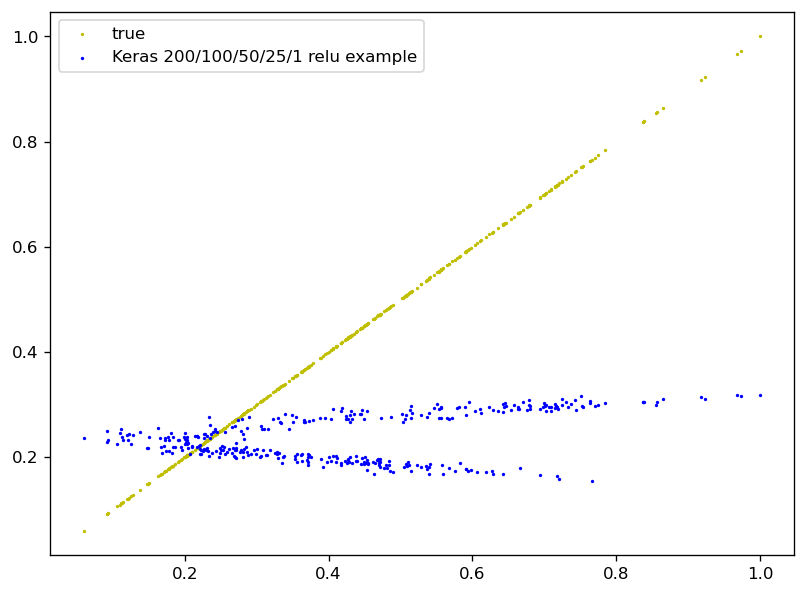

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.68138,0.204752,0.067501,0.439864,0.166962


In [16]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Wow that's bad.  
You can see the V shape of the tempature vs. demand curve, but this needs some work

In [17]:
# trying this Keras example: https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

model_desc = 'Keres less verbose'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 0s 689us/step - loss: 0.1618
Epoch 2/100
118/118 [==============================] - 0s 724us/step - loss: 0.1435
Epoch 3/100
118/118 [==============================] - 0s 724us/step - loss: 0.1264
Epoch 4/100
118/118 [==============================] - 0s 801us/step - loss: 0.1105
Epoch 5/100
118/118 [==============================] - 0s 615us/step - loss: 0.0960
Epoch 6/100
118/118 [==============================] - 0s 668us/step - loss: 0.0831
Epoch 7/100
118/118 [==============================] - 0s 723us/step - loss: 0.0722
Epoch 8/100
118/118 [==============================] - 0s 857us/step - loss: 0.0629
Epoch 9/100
118/118 [==============================] - 0s 723us/step - loss: 0.0553
Epoch 10/100
118/118 [==============================] - 0s 815us/step - loss: 0.0489
Epoch 11/100
118/118 [==============================] - 0s 624us/step - loss: 0.0437
Epoch 12/100
118/118 [==============================] - 0s 724us/step - lo

118/118 [==============================] - 0s 938us/step - loss: 0.0053
Epoch 98/100
118/118 [==============================] - 0s 991us/step - loss: 0.0053
Epoch 99/100
118/118 [==============================] - 0s 857us/step - loss: 0.0052
Epoch 100/100
118/118 [==============================] - 0s 1ms/step - loss: 0.0051


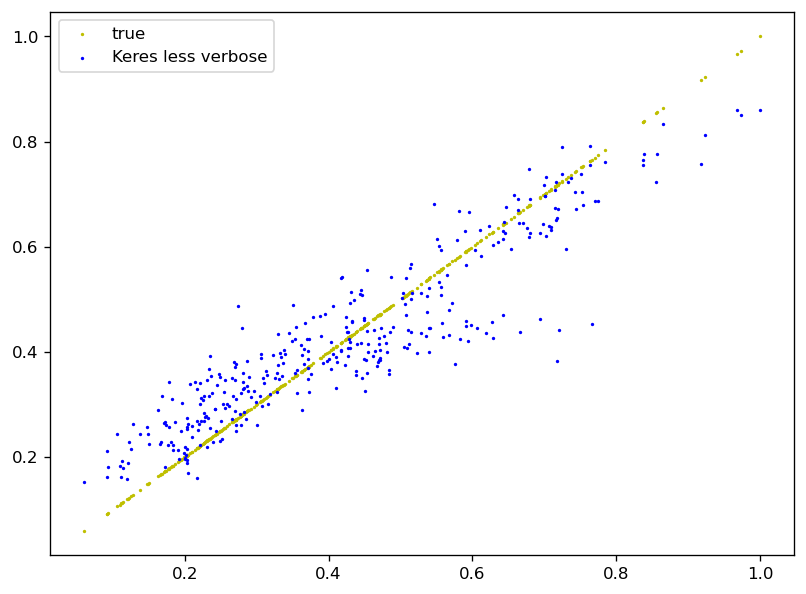

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542


In [18]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(3)

## Better
But not good.  Continue to try different things below:

In [19]:
model_desc = 'Keres wider middle'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 2ms/step - loss: 0.0753
Epoch 2/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0496
Epoch 3/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0371
Epoch 4/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0311
Epoch 5/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0282
Epoch 6/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0263
Epoch 7/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0249
Epoch 8/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0236
Epoch 9/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0224
Epoch 10/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0213
Epoch 11/100
118/118 [==============================] - 0s 3ms/step - loss: 0.0203
Epoch 12/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0194
Epoch 13/100


118/118 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 100/100
118/118 [==============================] - 0s 2ms/step - loss: 0.0023


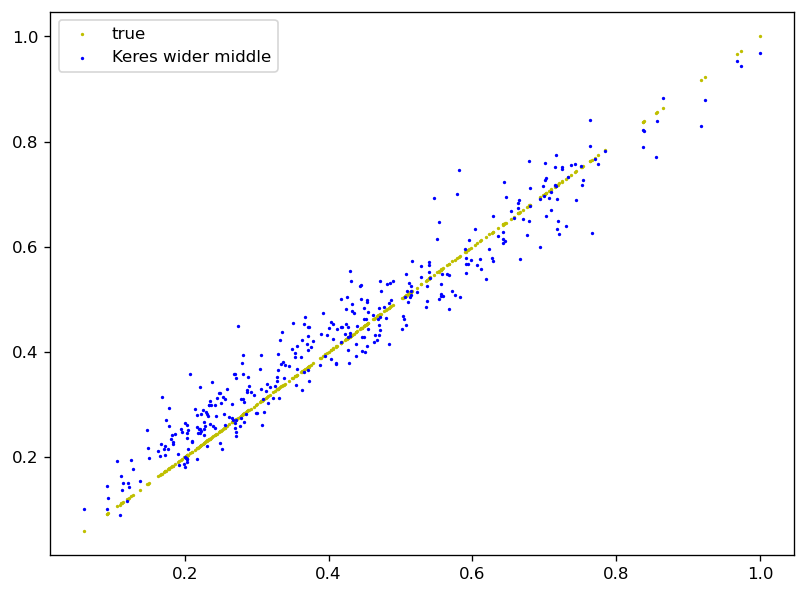

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178


In [20]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

### That is about as good as the scikit-learn models on the same data
only much, much slower :)

In [21]:
model_desc = 'Keres widerer middle'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 0.1461
Epoch 2/100
118/118 [==============================] - 1s 4ms/step - loss: 0.1002
Epoch 3/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0706
Epoch 4/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0511
Epoch 5/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0390
Epoch 6/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0318
Epoch 7/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0277
Epoch 8/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0254
Epoch 9/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0238
Epoch 10/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0225
Epoch 11/100
118/118 [==============================] - 0s 4ms/step - loss: 0.0214
Epoch 12/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0205
Epoch 13/100


118/118 [==============================] - 1s 4ms/step - loss: 0.0033
Epoch 100/100
118/118 [==============================] - 1s 4ms/step - loss: 0.0033


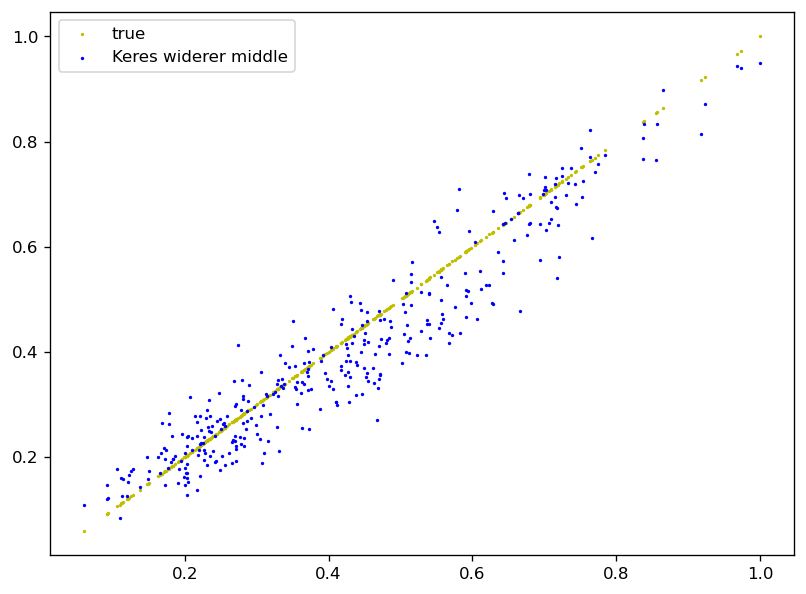

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202


In [22]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [23]:
model_desc = 'Keres wider middle 200 epochs'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0330
Epoch 2/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0254
Epoch 3/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0222
Epoch 4/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0199
Epoch 5/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0181
Epoch 6/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0165
Epoch 7/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0152
Epoch 8/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0140
Epoch 9/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0128
Epoch 10/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 11/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0110
Epoch 12/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 13/200


118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 100/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 101/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0020
Epoch 102/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 103/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 104/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 105/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 106/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 107/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 108/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 109/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 110/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 

118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 197/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 198/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 199/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 200/200
118/118 [==============================] - 0s 2ms/step - loss: 0.0016


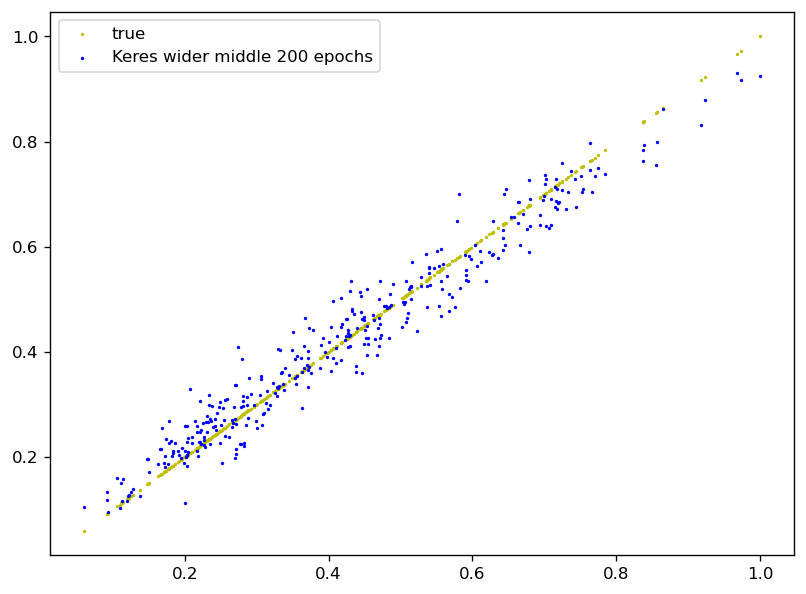

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252


In [24]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [25]:
model_desc = 'Keres 200-2000-20'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 1s 3ms/step - loss: 0.1266
Epoch 2/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0759
Epoch 3/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0507
Epoch 4/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0387
Epoch 5/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0331
Epoch 6/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0301
Epoch 7/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0281
Epoch 8/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0266
Epoch 9/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0253
Epoch 10/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0241
Epoch 11/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 12/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0219
Epoch 13/200


118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 100/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 101/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 102/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 103/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 104/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 105/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 106/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 107/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 108/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 109/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 110/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 

118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 197/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 198/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 199/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 200/200
118/118 [==============================] - 0s 3ms/step - loss: 0.0017


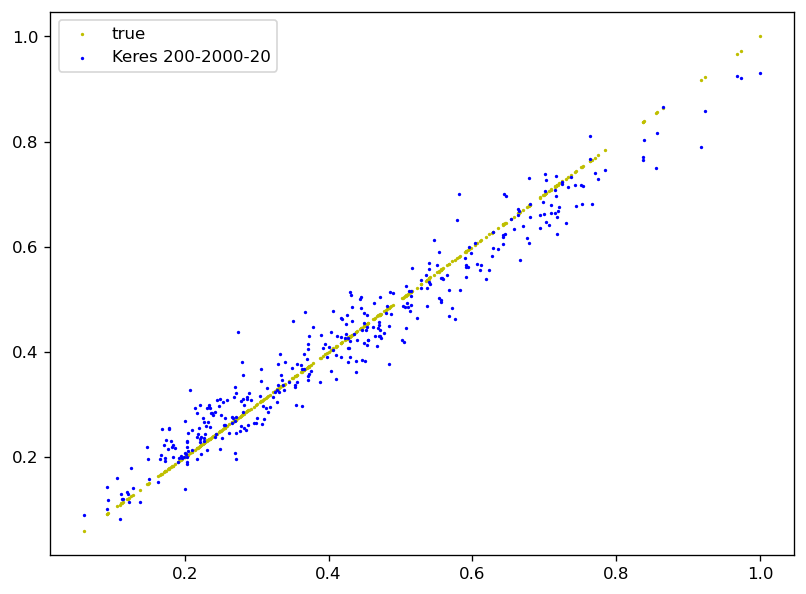

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195


In [26]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [27]:
# this one takes a long time and doesn't work well.  skip.

model_desc = 'Keres 482-2000-200-20'

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

# y_pred = model.predict(X_test)

In [28]:
# try RMSprop 
# this one is also slow and can be skipped

from tensorflow.keras.optimizers import RMSprop

model_desc = 'Keres 482-2000-200-20 RMSprop'

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(Dense(2000, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

# model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

# y_pred = model.predict(X_test)

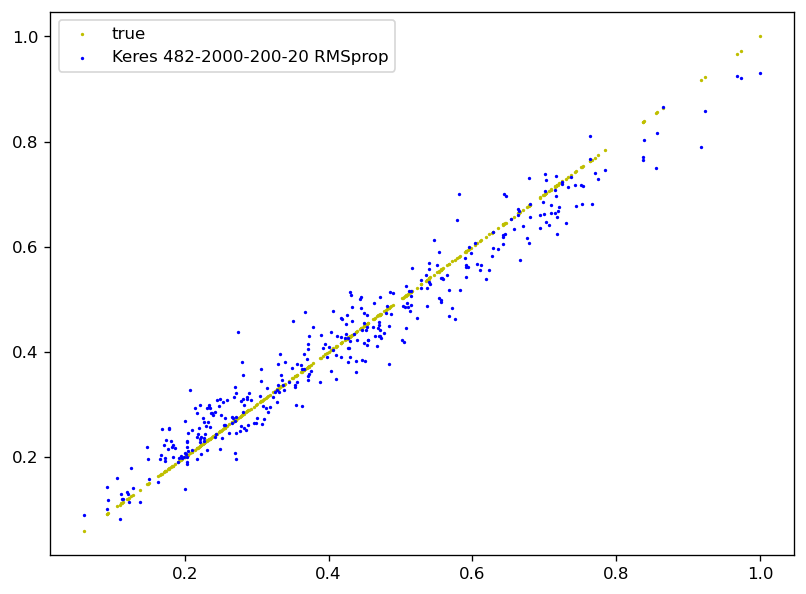

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195


In [29]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [30]:
from tensorflow.keras.layers import LeakyReLU

model_desc = 'Keres 200-2000-20 leaky'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adadelta())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 590us/step - loss: 0.0485
Epoch 2/200
118/118 [==============================] - 0s 456us/step - loss: 0.0427
Epoch 3/200
118/118 [==============================] - 0s 668us/step - loss: 0.0388
Epoch 4/200
118/118 [==============================] - 0s 590us/step - loss: 0.0361
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.0341
Epoch 6/200
118/118 [==============================] - 0s 699us/step - loss: 0.0327
Epoch 7/200
118/118 [==============================] - 0s 490us/step - loss: 0.0315
Epoch 8/200
118/118 [==============================] - 0s 508us/step - loss: 0.0306
Epoch 9/200
118/118 [==============================] - 0s 724us/step - loss: 0.0299
Epoch 10/200
118/118 [==============================] - 0s 668us/step - loss: 0.0291
Epoch 11/200
118/118 [==============================] - 0s 534us/step - loss: 0.0285
Epoch 12/200
118/118 [==============================] - 0s 724us/step - lo

118/118 [==============================] - 0s 668us/step - loss: 0.0049
Epoch 98/200
118/118 [==============================] - 0s 590us/step - loss: 0.0049
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0048
Epoch 100/200
118/118 [==============================] - 0s 589us/step - loss: 0.0048
Epoch 101/200
118/118 [==============================] - 0s 534us/step - loss: 0.0047
Epoch 102/200
118/118 [==============================] - 0s 590us/step - loss: 0.0046
Epoch 103/200
118/118 [==============================] - 0s 590us/step - loss: 0.0046
Epoch 104/200
118/118 [==============================] - 0s 534us/step - loss: 0.0045
Epoch 105/200
118/118 [==============================] - 0s 590us/step - loss: 0.0045
Epoch 106/200
118/118 [==============================] - 0s 590us/step - loss: 0.0044
Epoch 107/200
118/118 [==============================] - 0s 707us/step - loss: 0.0043
Epoch 108/200
118/118 [==============================] - 0s 546us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0026
Epoch 193/200
118/118 [==============================] - 0s 534us/step - loss: 0.0026
Epoch 194/200
118/118 [==============================] - 0s 724us/step - loss: 0.0026
Epoch 195/200
118/118 [==============================] - 0s 590us/step - loss: 0.0026
Epoch 196/200
118/118 [==============================] - 0s 590us/step - loss: 0.0026
Epoch 197/200
118/118 [==============================] - 0s 654us/step - loss: 0.0026
Epoch 198/200
118/118 [==============================] - 0s 586us/step - loss: 0.0026
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0026
Epoch 200/200
118/118 [==============================] - 0s 534us/step - loss: 0.0026


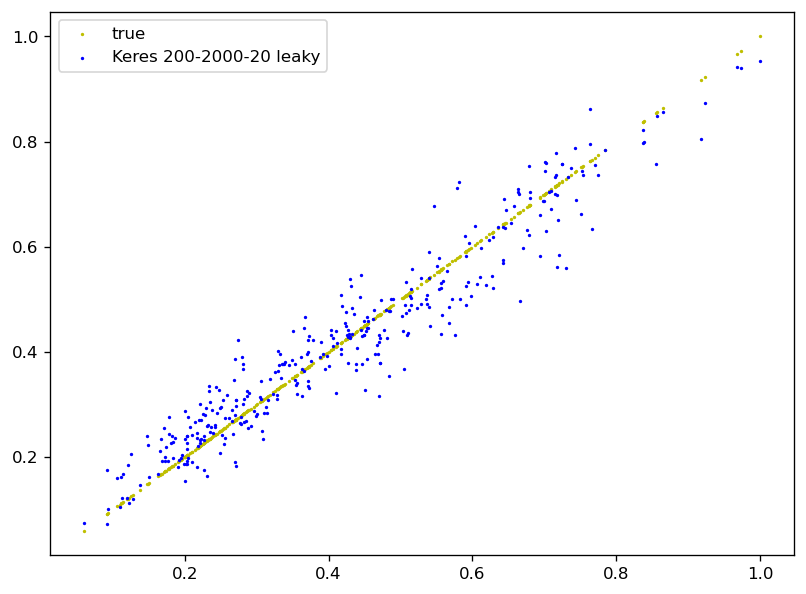

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225


In [31]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [32]:
# best so far!
from tensorflow.keras.optimizers import RMSprop

model_desc = 'Keres 200-2000-20 leaky RMSprop'

# Model from example
model = Sequential()
model.add(Dense(200, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(20))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 589us/step - loss: 0.0113
Epoch 2/200
118/118 [==============================] - 0s 668us/step - loss: 0.0067
Epoch 3/200
118/118 [==============================] - 0s 590us/step - loss: 0.0060
Epoch 4/200
118/118 [==============================] - 0s 663us/step - loss: 0.0049
Epoch 5/200
118/118 [==============================] - 0s 534us/step - loss: 0.0043
Epoch 6/200
118/118 [==============================] - 0s 534us/step - loss: 0.0039
Epoch 7/200
118/118 [==============================] - 0s 590us/step - loss: 0.0036
Epoch 8/200
118/118 [==============================] - 0s 590us/step - loss: 0.0034
Epoch 9/200
118/118 [==============================] - 0s 668us/step - loss: 0.0029
Epoch 10/200
118/118 [==============================] - 0s 590us/step - loss: 0.0028
Epoch 11/200
118/118 [==============================] - 0s 698us/step - loss: 0.0029
Epoch 12/200
118/118 [==============================] - 0s 598us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.0013
Epoch 98/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 99/200
118/118 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 100/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 101/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 102/200
118/118 [==============================] - 0s 630us/step - loss: 0.0014
Epoch 103/200
118/118 [==============================] - 0s 473us/step - loss: 0.0014
Epoch 104/200
118/118 [==============================] - 0s 594us/step - loss: 0.0014
Epoch 105/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 106/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 107/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 108/200
118/118 [==============================] - 0s 724us/step

118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 193/200
118/118 [==============================] - 0s 668us/step - loss: 0.0011
Epoch 194/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 195/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 196/200
118/118 [==============================] - 0s 646us/step - loss: 0.0012
Epoch 197/200
118/118 [==============================] - 0s 611us/step - loss: 0.0012
Epoch 198/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 200/200
118/118 [==============================] - 0s 668us/step - loss: 0.0011


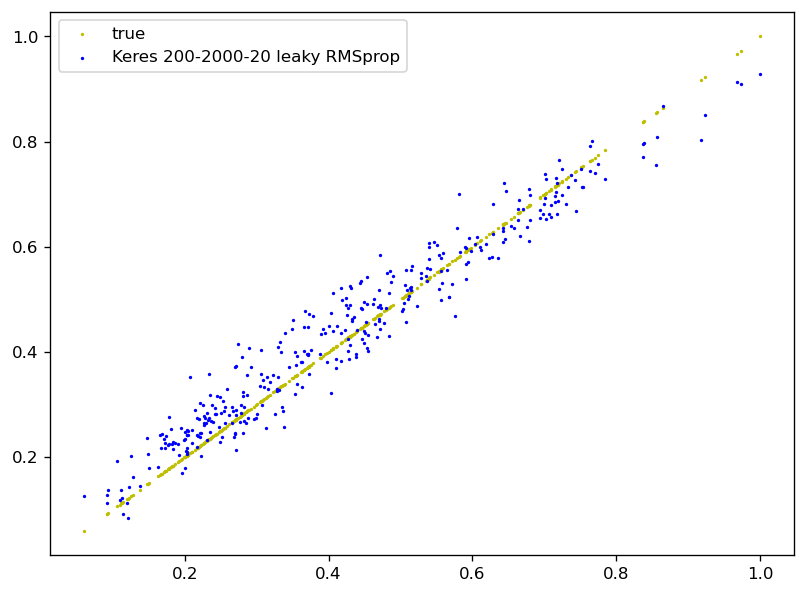

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701


In [33]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [34]:
model_desc = 'Keres 482-2000L-200L RMSprop'
from tensorflow.keras.optimizers import RMSprop

# Model from example
model = Sequential()
model.add(Dense(482, input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())
#model.compile(optimizer=Adam(learning_rate=0.1),loss='mean_squared_error')

model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 723us/step - loss: 0.0216
Epoch 2/200
118/118 [==============================] - 0s 534us/step - loss: 0.0115
Epoch 3/200
118/118 [==============================] - 0s 650us/step - loss: 0.0079
Epoch 4/200
118/118 [==============================] - 0s 663us/step - loss: 0.0058
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.0053
Epoch 6/200
118/118 [==============================] - 0s 590us/step - loss: 0.0044
Epoch 7/200
118/118 [==============================] - 0s 801us/step - loss: 0.0040
Epoch 8/200
118/118 [==============================] - 0s 724us/step - loss: 0.0034
Epoch 9/200
118/118 [==============================] - 0s 721us/step - loss: 0.0031
Epoch 10/200
118/118 [==============================] - 0s 574us/step - loss: 0.0027
Epoch 11/200
118/118 [==============================] - 0s 857us/step - loss: 0.0027
Epoch 12/200
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 724us/step - loss: 0.0014
Epoch 98/200
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 100/200
118/118 [==============================] - 0s 779us/step - loss: 0.0013
Epoch 101/200
118/118 [==============================] - 0s 603us/step - loss: 0.0013
Epoch 102/200
118/118 [==============================] - 0s 723us/step - loss: 0.0014
Epoch 103/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 104/200
118/118 [==============================] - 0s 723us/step - loss: 0.0013
Epoch 105/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 106/200
118/118 [==============================] - 0s 802us/step - loss: 0.0013
Epoch 107/200
118/118 [==============================] - 0s 683us/step - loss: 0.0013
Epoch 108/200
118/118 [==============================] - 0s 672us/step

118/118 [==============================] - 0s 788us/step - loss: 0.0011
Epoch 193/200
118/118 [==============================] - 0s 721us/step - loss: 0.0011
Epoch 194/200
118/118 [==============================] - 0s 719us/step - loss: 0.0011
Epoch 195/200
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 196/200
118/118 [==============================] - 0s 724us/step - loss: 0.0011
Epoch 197/200
118/118 [==============================] - 0s 723us/step - loss: 0.0012
Epoch 198/200
118/118 [==============================] - 0s 673us/step - loss: 0.0011
Epoch 199/200
118/118 [==============================] - 0s 541us/step - loss: 0.0011
Epoch 200/200
118/118 [==============================] - 0s 745us/step - loss: 0.0011


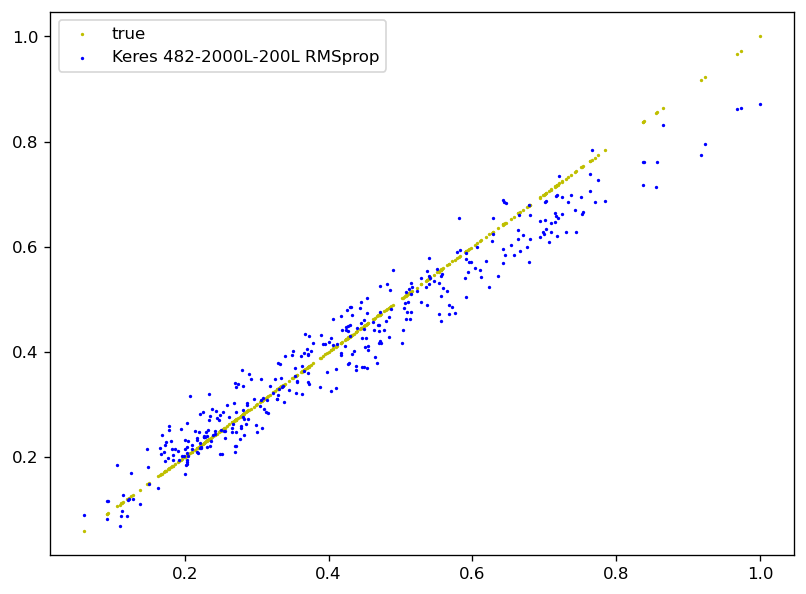

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keras 200/100/50/25/1 relu example,0.133963,-0.740676,0.681380,0.204752,0.067501,0.439864,0.166962
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
9,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532


In [35]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [36]:

model_desc = 'Keres 482-2000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 534us/step - loss: 0.0149
Epoch 2/300
118/118 [==============================] - 0s 590us/step - loss: 0.0074
Epoch 3/300
118/118 [==============================] - 0s 590us/step - loss: 0.0061
Epoch 4/300
118/118 [==============================] - 0s 534us/step - loss: 0.0055
Epoch 5/300
118/118 [==============================] - 0s 652us/step - loss: 0.0046
Epoch 6/300
118/118 [==============================] - 0s 507us/step - loss: 0.0045
Epoch 7/300
118/118 [==============================] - 0s 534us/step - loss: 0.0041
Epoch 8/300
118/118 [==============================] - 0s 456us/step - loss: 0.0040
Epoch 9/300
118/118 [==============================] - 0s 590us/step - loss: 0.0037
Epoch 10/300
118/118 [==============================] - 0s 534us/step - loss: 0.0035
Epoch 11/300
118/118 [==============================] - 0s 590us/step - loss: 0.0032
Epoch 12/300
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 487us/step - loss: 0.0014
Epoch 98/300
118/118 [==============================] - 0s 573us/step - loss: 0.0015
Epoch 99/300
118/118 [==============================] - 0s 723us/step - loss: 0.0014
Epoch 100/300
118/118 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 101/300
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 102/300
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 103/300
118/118 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 104/300
118/118 [==============================] - 0s 612us/step - loss: 0.0015
Epoch 105/300
118/118 [==============================] - 0s 698us/step - loss: 0.0014
Epoch 106/300
118/118 [==============================] - 0s 857us/step - loss: 0.0014
Epoch 107/300
118/118 [==============================] - 0s 724us/step - loss: 0.0014
Epoch 108/300
118/118 [==============================] - 0s 590us/step

118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 194/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 195/300
118/118 [==============================] - 0s 672us/step - loss: 0.0012
Epoch 196/300
118/118 [==============================] - 0s 586us/step - loss: 0.0012
Epoch 197/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 198/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 199/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 200/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 201/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 202/300
118/118 [==============================] - 0s 647us/step - loss: 0.0012
Epoch 203/300
118/118 [==============================] - 0s 541us/st

118/118 [==============================] - 0s 616us/step - loss: 0.0011
Epoch 288/300
118/118 [==============================] - 0s 413us/step - loss: 0.0011
Epoch 289/300
118/118 [==============================] - 0s 533us/step - loss: 0.0011
Epoch 290/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 291/300
118/118 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 292/300
118/118 [==============================] - 0s 590us/step - loss: 0.0011
Epoch 293/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 294/300
118/118 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 295/300
118/118 [==============================] - 0s 681us/step - loss: 0.0011
Epoch 296/300
118/118 [==============================] - 0s 481us/step - loss: 0.0011
Epoch 297/300
118/118 [==============================] - 0s 534us/step - loss: 0.0011
Epoch 298/300
118/118 [==============================] - 0s 456us/st

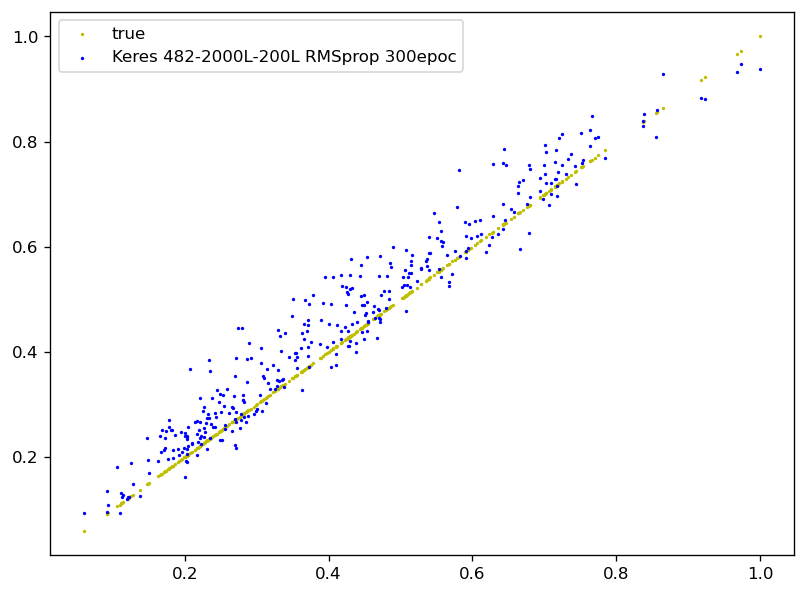

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
1,Keres less verbose,0.834583,0.834387,0.333665,0.062728,0.006422,0.196506,0.052542
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
9,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532
10,Keres 482-2000L-200L RMSprop 300epoc,0.949179,0.916484,0.171247,0.043682,0.003239,0.130603,0.034677


In [37]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [38]:

model_desc = 'Keres 482-2000L-400L-100R RMSprop 300'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(2000))
model.add(LeakyReLU(400))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())

model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 486us/step - loss: 0.0080
Epoch 2/300
118/118 [==============================] - 0s 621us/step - loss: 0.0041
Epoch 3/300
118/118 [==============================] - 0s 534us/step - loss: 0.0033
Epoch 4/300
118/118 [==============================] - 0s 560us/step - loss: 0.0030
Epoch 5/300
118/118 [==============================] - 0s 590us/step - loss: 0.0026
Epoch 6/300
118/118 [==============================] - 0s 723us/step - loss: 0.0024
Epoch 7/300
118/118 [==============================] - 0s 668us/step - loss: 0.0023
Epoch 8/300
118/118 [==============================] - 0s 590us/step - loss: 0.0023
Epoch 9/300
118/118 [==============================] - 0s 762us/step - loss: 0.0022
Epoch 10/300
118/118 [==============================] - 0s 547us/step - loss: 0.0022
Epoch 11/300
118/118 [==============================] - 0s 590us/step - loss: 0.0021
Epoch 12/300
118/118 [==============================] - 0s 668us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 98/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 99/300
118/118 [==============================] - 0s 707us/step - loss: 0.0012
Epoch 100/300
118/118 [==============================] - 0s 507us/step - loss: 0.0012
Epoch 101/300
118/118 [==============================] - 0s 620us/step - loss: 0.0013
Epoch 102/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 103/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 104/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 105/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 106/300
118/118 [==============================] - 0s 687us/step - loss: 0.0012
Epoch 107/300
118/118 [==============================] - 0s 510us/step - loss: 0.0011
Epoch 108/300
118/118 [==============================] - 0s 495us/step

118/118 [==============================] - 0s 590us/step - loss: 9.9677e-04
Epoch 192/300
118/118 [==============================] - 0s 723us/step - loss: 0.0010
Epoch 193/300
118/118 [==============================] - 0s 668us/step - loss: 9.3304e-04
Epoch 194/300
118/118 [==============================] - 0s 590us/step - loss: 9.8192e-04
Epoch 195/300
118/118 [==============================] - 0s 590us/step - loss: 9.9474e-04
Epoch 196/300
118/118 [==============================] - 0s 723us/step - loss: 9.5927e-04
Epoch 197/300
118/118 [==============================] - 0s 534us/step - loss: 9.3400e-04
Epoch 198/300
118/118 [==============================] - 0s 590us/step - loss: 9.9215e-04
Epoch 199/300
118/118 [==============================] - 0s 495us/step - loss: 9.5875e-04
Epoch 200/300
118/118 [==============================] - 0s 534us/step - loss: 9.7867e-04
Epoch 201/300
118/118 [==============================] - 0s 689us/step - loss: 9.5301e-04
Epoch 202/300
118/118 [=====

118/118 [==============================] - 0s 534us/step - loss: 8.0349e-04
Epoch 283/300
118/118 [==============================] - 0s 590us/step - loss: 7.8707e-04
Epoch 284/300
118/118 [==============================] - 0s 621us/step - loss: 7.8891e-04
Epoch 285/300
118/118 [==============================] - 0s 541us/step - loss: 7.9575e-04
Epoch 286/300
118/118 [==============================] - 0s 668us/step - loss: 9.0652e-04
Epoch 287/300
118/118 [==============================] - 0s 590us/step - loss: 7.9803e-04
Epoch 288/300
118/118 [==============================] - 0s 724us/step - loss: 7.6523e-04
Epoch 289/300
118/118 [==============================] - 0s 590us/step - loss: 8.2460e-04
Epoch 290/300
118/118 [==============================] - 0s 668us/step - loss: 7.7442e-04
Epoch 291/300
118/118 [==============================] - 0s 647us/step - loss: 7.8550e-04
Epoch 292/300
118/118 [==============================] - 0s 516us/step - loss: 7.9694e-04
Epoch 293/300
118/118 [=

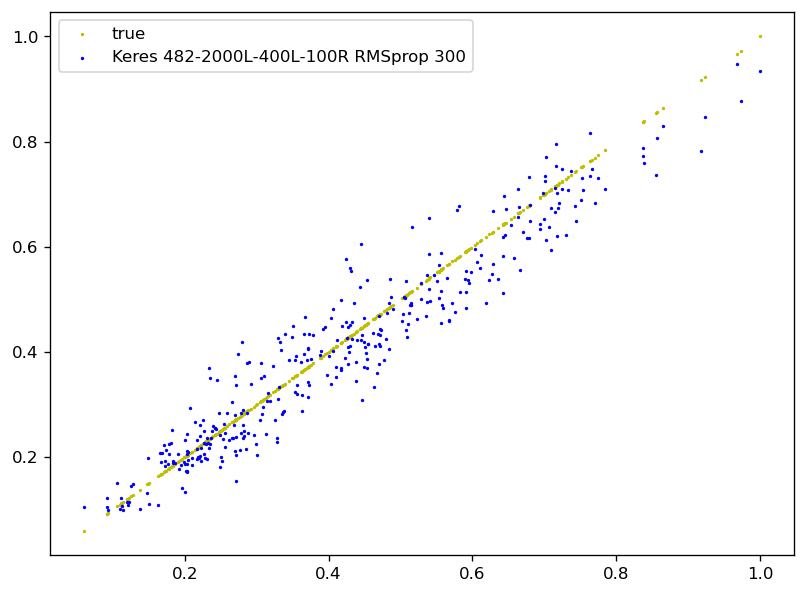

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
2,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
9,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532
10,Keres 482-2000L-200L RMSprop 300epoc,0.949179,0.916484,0.171247,0.043682,0.003239,0.130603,0.034677
11,Keres 482-2000L-400L-100R RMSprop 300,0.922501,0.918822,0.160175,0.045068,0.003148,0.121673,0.038918


In [39]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [40]:

model_desc = 'Keres 482-5000L-200L RMSprop 300epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(5000))
model.add(LeakyReLU(200))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=300, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/300
118/118 [==============================] - 0s 534us/step - loss: 0.0131
Epoch 2/300
118/118 [==============================] - 0s 456us/step - loss: 0.0069
Epoch 3/300
118/118 [==============================] - 0s 534us/step - loss: 0.0061
Epoch 4/300
118/118 [==============================] - 0s 456us/step - loss: 0.0054
Epoch 5/300
118/118 [==============================] - 0s 678us/step - loss: 0.0045
Epoch 6/300
118/118 [==============================] - 0s 507us/step - loss: 0.0047
Epoch 7/300
118/118 [==============================] - 0s 646us/step - loss: 0.0040
Epoch 8/300
118/118 [==============================] - 0s 590us/step - loss: 0.0039
Epoch 9/300
118/118 [==============================] - 0s 590us/step - loss: 0.0039
Epoch 10/300
118/118 [==============================] - 0s 534us/step - loss: 0.0037
Epoch 11/300
118/118 [==============================] - 0s 456us/step - loss: 0.0036
Epoch 12/300
118/118 [==============================] - 0s 456us/step - lo

118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 98/300
118/118 [==============================] - 0s 599us/step - loss: 0.0016
Epoch 99/300
118/118 [==============================] - 0s 534us/step - loss: 0.0015
Epoch 100/300
118/118 [==============================] - 0s 581us/step - loss: 0.0015
Epoch 101/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 102/300
118/118 [==============================] - 0s 534us/step - loss: 0.0015
Epoch 103/300
118/118 [==============================] - 0s 590us/step - loss: 0.0015
Epoch 104/300
118/118 [==============================] - 0s 590us/step - loss: 0.0016
Epoch 105/300
118/118 [==============================] - 0s 534us/step - loss: 0.0015
Epoch 106/300
118/118 [==============================] - 0s 603us/step - loss: 0.0015
Epoch 107/300
118/118 [==============================] - 0s 573us/step - loss: 0.0014
Epoch 108/300
118/118 [==============================] - 0s 534us/step

118/118 [==============================] - 0s 461us/step - loss: 0.0013
Epoch 193/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 194/300
118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 195/300
118/118 [==============================] - 0s 456us/step - loss: 0.0012
Epoch 196/300
118/118 [==============================] - 0s 456us/step - loss: 0.0012
Epoch 197/300
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 198/300
118/118 [==============================] - 0s 630us/step - loss: 0.0012
Epoch 199/300
118/118 [==============================] - 0s 533us/step - loss: 0.0013
Epoch 200/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 201/300
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 202/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 203/300
118/118 [==============================] - 0s 534us/st

118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 288/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 289/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 290/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 291/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 292/300
118/118 [==============================] - 0s 639us/step - loss: 0.0012
Epoch 293/300
118/118 [==============================] - 0s 515us/step - loss: 0.0012
Epoch 294/300
118/118 [==============================] - 0s 543us/step - loss: 0.0012
Epoch 295/300
118/118 [==============================] - 0s 534us/step - loss: 0.0012
Epoch 296/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 297/300
118/118 [==============================] - 0s 590us/step - loss: 0.0012
Epoch 298/300
118/118 [==============================] - 0s 534us/st

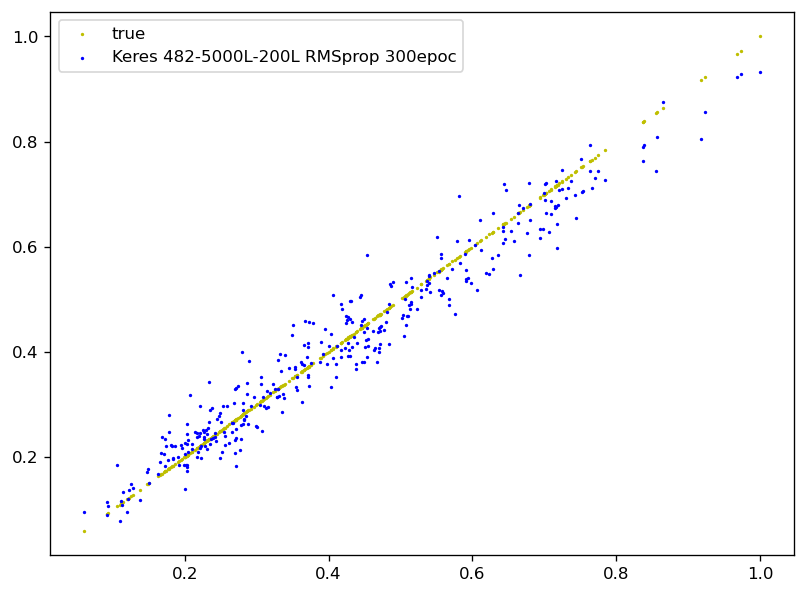

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
3,Keres widerer middle,0.910893,0.897590,0.196148,0.049585,0.003971,0.138109,0.040202
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
9,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532
10,Keres 482-2000L-200L RMSprop 300epoc,0.949179,0.916484,0.171247,0.043682,0.003239,0.130603,0.034677
11,Keres 482-2000L-400L-100R RMSprop 300,0.922501,0.918822,0.160175,0.045068,0.003148,0.121673,0.038918
12,Keres 482-5000L-200L RMSprop 300epoc,0.950637,0.950068,0.132400,0.034972,0.001936,0.098642,0.028939


In [41]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

In [42]:

model_desc = 'Keres 482-100L-1000L-100L RMSprop 200epoc'

# Model from example
model = Sequential()
model.add(Dense(len(predictor_names), input_dim=len(predictor_names), activation='relu'))
model.add(LeakyReLU(100))
model.add(LeakyReLU(1000))
model.add(LeakyReLU(100))
model.add(Dense(1))

# Compile model
model.compile(loss='mean_squared_error', optimizer=RMSprop())


model.fit(X_train, y_train, epochs=200, batch_size=10, verbose=1)

y_pred = model.predict(X_test)

Epoch 1/200
118/118 [==============================] - 0s 555us/step - loss: 0.0104
Epoch 2/200
118/118 [==============================] - 0s 456us/step - loss: 0.0047
Epoch 3/200
118/118 [==============================] - 0s 534us/step - loss: 0.0043
Epoch 4/200
118/118 [==============================] - 0s 456us/step - loss: 0.0036
Epoch 5/200
118/118 [==============================] - 0s 590us/step - loss: 0.0038
Epoch 6/200
118/118 [==============================] - 0s 668us/step - loss: 0.0032
Epoch 7/200
118/118 [==============================] - 0s 590us/step - loss: 0.0034
Epoch 8/200
118/118 [==============================] - 0s 587us/step - loss: 0.0031
Epoch 9/200
118/118 [==============================] - 0s 668us/step - loss: 0.0030
Epoch 10/200
118/118 [==============================] - 0s 534us/step - loss: 0.0029
Epoch 11/200
118/118 [==============================] - 0s 590us/step - loss: 0.0028
Epoch 12/200
118/118 [==============================] - 0s 590us/step - lo

118/118 [==============================] - 0s 534us/step - loss: 0.0015
Epoch 98/200
118/118 [==============================] - 0s 456us/step - loss: 0.0015
Epoch 99/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 100/200
118/118 [==============================] - 0s 629us/step - loss: 0.0015
Epoch 101/200
118/118 [==============================] - 0s 495us/step - loss: 0.0014
Epoch 102/200
118/118 [==============================] - 0s 590us/step - loss: 0.0014
Epoch 103/200
118/118 [==============================] - 0s 534us/step - loss: 0.0015
Epoch 104/200
118/118 [==============================] - 0s 456us/step - loss: 0.0015
Epoch 105/200
118/118 [==============================] - 0s 456us/step - loss: 0.0015
Epoch 106/200
118/118 [==============================] - 0s 668us/step - loss: 0.0015
Epoch 107/200
118/118 [==============================] - 0s 595us/step - loss: 0.0014
Epoch 108/200
118/118 [==============================] - 0s 434us/step

118/118 [==============================] - 0s 534us/step - loss: 0.0013
Epoch 193/200
118/118 [==============================] - 0s 456us/step - loss: 0.0013
Epoch 194/200
118/118 [==============================] - 0s 586us/step - loss: 0.0013
Epoch 195/200
118/118 [==============================] - 0s 668us/step - loss: 0.0013
Epoch 196/200
118/118 [==============================] - 0s 456us/step - loss: 0.0013
Epoch 197/200
118/118 [==============================] - 0s 456us/step - loss: 0.0013
Epoch 198/200
118/118 [==============================] - 0s 668us/step - loss: 0.0012
Epoch 199/200
118/118 [==============================] - 0s 590us/step - loss: 0.0013
Epoch 200/200
118/118 [==============================] - 0s 590us/step - loss: 0.0012


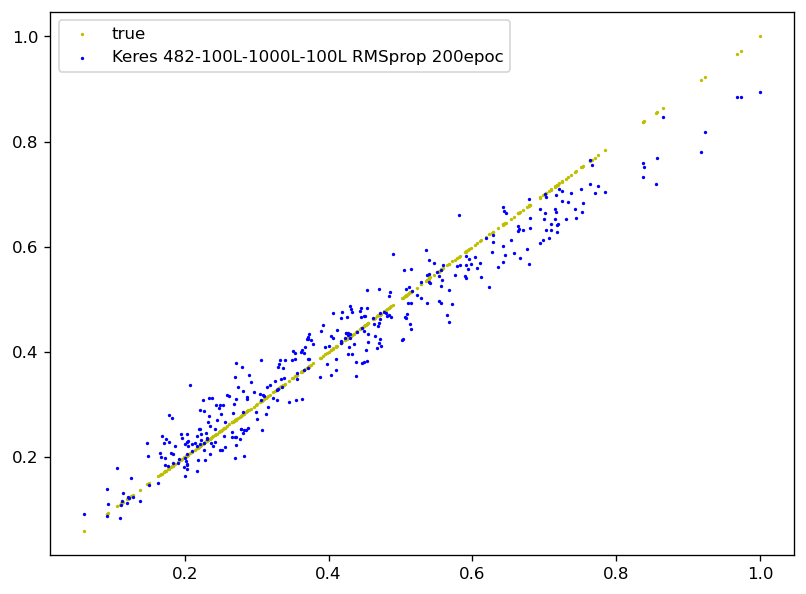

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
4,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
5,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
6,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
7,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
8,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
9,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532
10,Keres 482-2000L-200L RMSprop 300epoc,0.949179,0.916484,0.171247,0.043682,0.003239,0.130603,0.034677
11,Keres 482-2000L-400L-100R RMSprop 300,0.922501,0.918822,0.160175,0.045068,0.003148,0.121673,0.038918
12,Keres 482-5000L-200L RMSprop 300epoc,0.950637,0.950068,0.132400,0.034972,0.001936,0.098642,0.028939
13,Keres 482-100L-1000L-100L RMSprop 200epoc,0.945339,0.944347,0.137114,0.037109,0.002158,0.103724,0.032517


In [43]:
# show results
myplot(model_desc, y_test, y_pred)

# save results for report
report = add_to_report(report, model_desc, y_test, y_pred)
report.tail(10)

## Report best performing configurations by R2/COD

In [44]:
# Best performing models: 
report.sort_values(by='R2/COD', ignore_index=True, ascending=False)

,Algorithm,Explained Variance,R2/COD,Max Error,Mean AE,Mean Squared Error,MAPE,Median AE
0,Keres wider middle 200 epochs,0.953894,0.953812,0.135528,0.033436,0.001791,0.098753,0.028252
1,Keres 200-2000-20,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
2,Keres 482-2000-200-20 RMSprop,0.951350,0.951316,0.163452,0.034321,0.001888,0.101042,0.029195
3,Keres 482-5000L-200L RMSprop 300epoc,0.950637,0.950068,0.132400,0.034972,0.001936,0.098642,0.028939
4,Keres 482-100L-1000L-100L RMSprop 200epoc,0.945339,0.944347,0.137114,0.037109,0.002158,0.103724,0.032517
5,Keres 482-2000L-200L RMSprop,0.945784,0.942471,0.142885,0.037279,0.002231,0.100452,0.031532
6,Keres 200-2000-20 leaky RMSprop,0.946434,0.940087,0.146073,0.039251,0.002323,0.124847,0.033701
7,Keres wider middle,0.942126,0.934713,0.173702,0.039958,0.002532,0.128018,0.033178
8,Keres 200-2000-20 leaky,0.923315,0.923314,0.169961,0.041765,0.002974,0.121278,0.033225
9,Keres 482-2000L-400L-100R RMSprop 300,0.922501,0.918822,0.160175,0.045068,0.003148,0.121673,0.038918



# Project Summary: 

* point one
* point two
* What I would do if this were my only problem in life